In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

import matplotlib.pyplot as plt
import AutomationModule as AM
from tidy3d import web
import tidy3d as td
import numpy as np

In [2]:
tidy3dAPI = os.environ["API_TIDY3D_KEY"]

In [3]:
#structure_1 = AM.loadFromFile(key = tidy3dAPI, file_path="D:\phd stuff\\tidy3d\data\RCP Sample 1 Long Run With Monitors\z_incidence\\01_Sample_600_res_L18.01_28ff_eps_eps_12.960000038146973_size_18_runtime_600_lambdaRange_2.25-1.95_incidence_z.txt")

In [4]:
sim_data = td.SimulationData.from_hdf5("output/data/01_Sample_600_res_L18.01_28ff_eps_eps_12.960000038146973_size_18_runtime_600_lambdaRange_2.25-1.95_incidence_z_Whole/Data.hdf5")

In [5]:
sim_data_0 = td.SimulationData.from_hdf5("output/data/01_Sample_600_res_L18.01_28ff_eps_eps_12.960000038146973_size_18_runtime_600_lambdaRange_2.25-1.95_incidence_z_Whole/Data_0.hdf5")


<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:13: SyntaxWarning: invalid escape sequence '\l'
C:\Users\HernandF\AppData\Local\Temp\ipykernel_2380\3670317588.py:13: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda (\mu m)$')


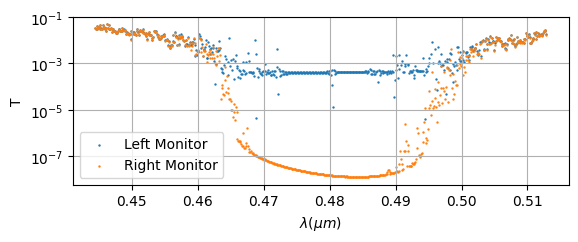

In [6]:
import numpy as np
#Retrieve the power flux through the monitor plane.
transmission0 = sim_data_0['flux1'].flux
transmission = sim_data['flux1'].flux
transmission_normalized = transmission / transmission0
transmission_flux_right = sim_data['flux1'].flux
transmission_flux_left = sim_data['flux2'].flux
monitor_lambdas = td.C_0/np.array(np.array(sim_data.simulation.monitors)[0].freqs)
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
ax.scatter(1/monitor_lambdas, (transmission_flux_left/transmission0), label='Left Monitor',s=0.5)
ax.scatter(1/monitor_lambdas, (transmission_flux_right/transmission0), label='Right Monitor',s=0.5)
plt.xlabel('$\lambda (\mu m)$')
plt.ylabel('T')
plt.legend()
ax.set_yscale("log")
plt.grid()
plt.show()

In [7]:
int_half = sim_data.get_intensity("time_monitorH")
int_end = sim_data.get_intensity("time_monitorFinal")
flux_f = sim_data["flux1"].flux
flux_t = sim_data["time_monitorT"].flux


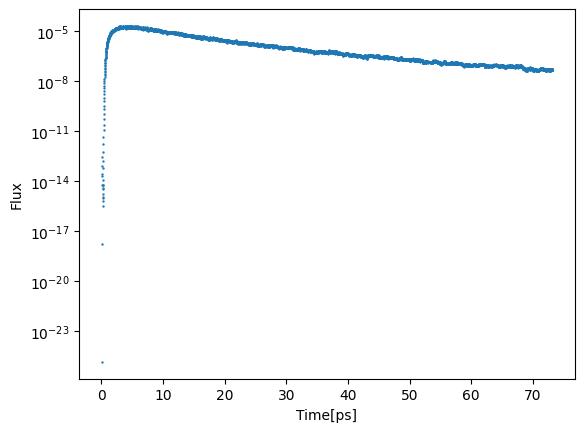

In [8]:
flux_index = np.argmax(flux_t.values)

fig = plt.figure()
ax = plt.gca()
ax.scatter(flux_t['t'][:]*1e12,flux_t[:],s=0.5)
plt.ylabel("Flux")
plt.xlabel("Time[ps]")
ax.set_yscale("log")

In [ ]:
def take_log(intensity):
    return np.log10((intensity / np.max(intensity))+1e-2)

In [ ]:

take_log(int_half).interp(z=0).squeeze().plot.pcolormesh()
plt.show()
take_log(int_end).interp(z=0).squeeze().plot.pcolormesh()
plt.show()


In [ ]:
sim_data = ""

In [ ]:
# import vtk
# import numpy as np

# # Create a NumPy array
# data = take_log(int_half[:,:,:,0])  # Example array

# # Create a vtkImageData objectimage_data = vtk.vtkImageData()
# image_data = vtk.vtkImageData()
# image_data.SetDimensions(data.shape)
# image_data.AllocateScalars(vtk.VTK_FLOAT, 1)

# # Copy NumPy array data to vtkImageData
# for z in range(data.shape[0]):
#     for y in range(data.shape[1]):
#         for x in range(data.shape[2]):
#             image_data.SetScalarComponentFromFloat(x, y, z, 0, data[z, y, x])

# # Write to VTK file
# writer = vtk.vtkDataSetWriter()
# writer.SetFileName("output.vtk")
# writer.SetInputData(image_data)
# writer.Write()
